In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_objects import get_fluorophore_list
from imaging_model import form_A_filter_model, fast_form_A_simultaneous, fast_form_A
from information_matrix import read_qe, FIM

# Global Parameters

In [2]:
wavelength_range = (400,900)
illumination_wavelengths = [[405], [488], [561], [637]]
k = [[1], [1], [1], [1]]
x_vec = np.array([1, 1, 1, 1])
variance = 2
qe = read_qe(wavelength_range)
fluorophore_list = get_fluorophore_list(wavelength_range=wavelength_range)

# Filter Model

In [3]:
filter_bins = [
    (400, 482),
    (484, 559),
    (561, 627),
    (629, 900)
]

In [4]:
A = form_A_filter_model(illumination_wavelengths, k, filter_bins, fluorophore_list, qe)

In [5]:
F = FIM(A, x_vec, variance)
CRLB = np.diagonal(np.linalg.inv(F))
FOM = x_vec / np.sqrt(CRLB)
FOM_filter = FOM

# Hyperspectral Model

In [6]:
bin_width = 10

In [7]:
A = fast_form_A_simultaneous(illumination_wavelengths, k, wavelength_range, bin_width, fluorophore_list, qe=qe)

In [8]:
F = FIM(A, x_vec, variance)
CRLB = np.diagonal(np.linalg.inv(F))
FOM = x_vec / np.sqrt(CRLB)
FOM_hyperspectral = FOM

# Results

In [9]:
FOM_filter

array([1.45144318, 5.80131832, 2.09054715, 4.51710264])

In [10]:
FOM_hyperspectral

array([0.9913852 , 4.75468876, 1.25006842, 3.68061282])

# Plot of Hyperspectral Performance

In [11]:
divisors_of_five_hundred = [2, 4, 5, 10, 20, 25, 50, 100, 125, 250]
results_array = np.zeros( (len(divisors_of_five_hundred), len(FOM_hyperspectral)) )

for i in range(len(divisors_of_five_hundred)):
    bin_width = divisors_of_five_hundred[i]
    A = fast_form_A_simultaneous(illumination_wavelengths, k, wavelength_range, bin_width, fluorophore_list, qe=qe)
    F = FIM(A, x_vec, variance)
    CRLB = np.diagonal(np.linalg.inv(F))
    FOM = x_vec / np.sqrt(CRLB)
    results_array[i,:] = FOM

scaled_results = results_array / FOM_filter
scaled_results

array([[0.21658332, 0.34543573, 0.18575145, 0.3162348 ],
       [0.42715148, 0.60067314, 0.36840183, 0.57496253],
       [0.49278065, 0.66544514, 0.42611734, 0.64439402],
       [0.68303411, 0.81958763, 0.59796232, 0.81481718],
       [0.8320269 , 0.91708784, 0.74439589, 0.92231041],
       [0.86179084, 0.93868518, 0.77981026, 0.94591923],
       [0.8257753 , 0.98068679, 0.78586402, 0.99009298],
       [0.70129898, 1.00419798, 0.71393906, 1.02877335],
       [0.88248076, 0.97632984, 0.84011146, 1.01038782],
       [0.88265068, 0.98944243, 0.85276939, 0.99105276]])

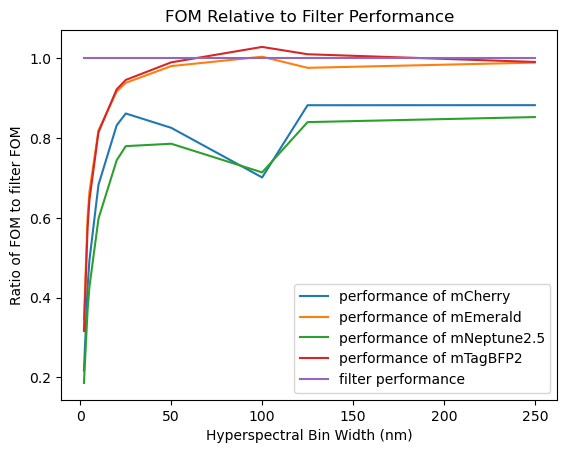

In [12]:
for j in range(len(fluorophore_list)):
    fluorophore = fluorophore_list[j]
    results = scaled_results[:,j]
    plt.plot(divisors_of_five_hundred, results, label="performance of {}".format(fluorophore.name))

plt.plot(divisors_of_five_hundred, np.ones_like(np.array(divisors_of_five_hundred)), label="filter performance")

plt.title("FOM Relative to Filter Performance")
plt.xlabel("Hyperspectral Bin Width (nm)")
plt.ylabel("Ratio of FOM to filter FOM")
plt.legend()
plt.show()

### Caveats:
- k chosen arbitrarily
- filter wavelengths chosen to contain each emission peak, which may not be realistic as more fluorophores are added or if we have limited choices for filters